In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# How to select data of a certain group of customers?

In [2]:
DATA_URI = (
    '/home/louberehc/OCR/projets/7_scoring_model/'
    'pickle_files/features_sample.pkl'
)

def get_data():
    """
    Get the data about of all customers and cache it.
    """
    df = pd.read_pickle(DATA_URI)
    target = df.pop('TARGET')
    return df, target

customer_id = 185507

# Define features to groupby
grouper1 = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AGE_RANGE']
grouper2 = ['CREDIT_TO_ANNUITY_GROUP', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']   
    


In [3]:
df, target = get_data()


In [4]:
groups = df.groupby(grouper1)
len(groups)


164

In [5]:
for group_name, group in groups.__iter__():
    print(group_name)
    print(group.shape)
    print(group.index)
    break


(0, -1, 1)
(16, 735)
Index([159062, 421125, 181537, 144162, 230840, 246040, 320738, 448092, 197385,
       211904, 364697, 355330, 435052, 327684, 242364, 282821],
      dtype='int32', name='SK_ID_CURR')


In [7]:
from typing import List
def get_group_data(customer_id: int, data: pd.DataFrame, grouper: List[str]):
    """ get data of the group the customer is in.
    
    - customer_id: The customer_id.
    - data: data of all customers.
    - grouper: a list of features to group by.
    """
    for group_name, group in data.groupby(grouper).__iter__():
        if customer_id in group.index:
            sel_data = group
            break
    return sel_data


In [10]:
data_g1 = get_group_data(customer_id, df, grouper1)
data_g1


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,PAYMENT_MEAN_TO_ANNUITY_RATIO,CURRENT_TO_BUREAU_ANNUITY_MEAN_RATIO,CTA_CREDIT_TO_ANNUITY_MAX_RATIO,CTA_CREDIT_TO_ANNUITY_MEAN_RATIO,DAYS_DECISION_MEAN_TO_BIRTH,DAYS_CREDIT_MEAN_TO_BIRTH,DAYS_DECISION_MEAN_TO_EMPLOYED,DAYS_CREDIT_MEAN_TO_EMPLOYED,HOUR_APPR_RATIO,HOUR_APPR_DIFFERENCE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
185507,0,1,0,0,180000.0,531265.5,20155.5,373500.0,0,0,...,1.549284,NaN,1.297440,0.517887,0.084483,0.006518,1.048828,0.080933,1.354492,3.140625
138766,0,0,1,0,225000.0,808650.0,26217.0,675000.0,2,0,...,0.267725,NaN,NaN,NaN,NaN,0.017259,NaN,0.142334,1.058594,1.000000
342778,0,1,0,0,675000.0,1724688.0,54283.5,1575000.0,2,0,...,7.783782,NaN,0.298733,0.298733,0.037980,0.089485,0.854004,2.011719,1.000000,0.000000
331880,0,1,0,1,49500.0,646920.0,20866.5,540000.0,0,0,...,0.230449,NaN,0.699586,0.299193,0.095986,0.111020,0.467773,0.541016,0.846191,-2.000000
270580,1,0,0,0,225000.0,270000.0,13500.0,270000.0,1,0,...,2.285512,NaN,0.495393,0.495393,0.010151,0.001622,0.067932,0.010849,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360484,0,1,0,1,112500.0,257292.0,10944.0,157500.0,0,0,...,0.344978,1.094298,0.214123,0.214123,0.147629,0.067541,0.295166,0.135010,1.307617,4.000000
243202,0,1,0,0,230400.0,900000.0,26446.5,900000.0,2,0,...,0.200221,NaN,0.587695,0.269776,0.094937,0.067636,1.216797,0.866699,1.046875,0.539062
306386,1,1,0,0,157500.0,225000.0,11250.0,225000.0,2,0,...,5.402095,NaN,1.895376,0.879930,0.061581,0.094802,0.615234,0.947266,0.562500,-7.000000


In [11]:
data_g2 = get_group_data(customer_id, df, grouper2)
data_g2

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,PAYMENT_MEAN_TO_ANNUITY_RATIO,CURRENT_TO_BUREAU_ANNUITY_MEAN_RATIO,CTA_CREDIT_TO_ANNUITY_MAX_RATIO,CTA_CREDIT_TO_ANNUITY_MEAN_RATIO,DAYS_DECISION_MEAN_TO_BIRTH,DAYS_CREDIT_MEAN_TO_BIRTH,DAYS_DECISION_MEAN_TO_EMPLOYED,DAYS_CREDIT_MEAN_TO_EMPLOYED,HOUR_APPR_RATIO,HOUR_APPR_DIFFERENCE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
185507,0,1,0,0,180000.0,531265.5,20155.5,373500.0,0,0,...,1.549284,NaN,1.297440,0.517887,0.084483,0.006518,1.048828,0.080933,1.354492,3.140625
159062,0,0,1,0,198000.0,906615.0,35415.0,688500.0,0,0,...,0.163587,NaN,0.355200,0.331291,0.183854,0.096574,0.715332,0.375732,1.037109,0.398438
316568,0,1,1,0,90000.0,302544.0,10993.5,198000.0,0,0,...,0.507787,NaN,0.726860,0.372752,0.042002,0.059435,0.272461,0.385498,1.084961,0.781250
351381,0,1,0,0,247500.0,771493.5,27711.0,666000.0,0,0,...,0.268340,NaN,0.797226,0.669965,0.075694,0.068709,1.914062,1.737305,0.856934,-1.500000
379602,0,0,1,1,162000.0,486459.0,18468.0,342000.0,0,0,...,0.318022,NaN,0.759193,0.448667,0.116028,0.091094,1.678711,1.318359,0.694336,-4.398438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375901,0,0,1,1,135000.0,1006920.0,40063.5,900000.0,0,0,...,0.485149,NaN,0.795525,0.406842,0.027009,0.093576,0.309570,1.072266,0.731934,-3.664062
322840,0,0,1,0,180000.0,284400.0,10849.5,225000.0,0,0,...,0.550078,NaN,0.382528,0.253195,0.073411,0.093816,0.972168,1.242188,2.080078,6.750000
155074,0,1,0,0,54000.0,522000.0,20358.0,522000.0,0,0,...,0.348134,NaN,0.990714,0.516557,0.115097,NaN,0.206665,NaN,1.018555,0.203125


# Plot a feature relatively to the group

In [15]:
data_g1.columns[:50]

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LAND

<Axes: ylabel='Frequency'>

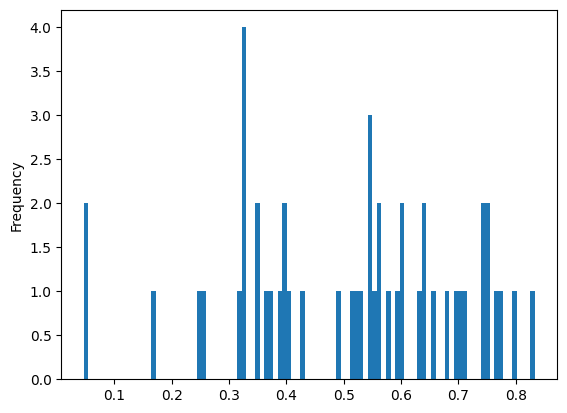

In [48]:
sel_ft = 'EXT_SOURCE_3'

ft_data = data_g1.loc[:, sel_ft]
ft_data.plot(kind='hist', bins=100)

In [49]:
ft_data_targ = pd.concat([ft_data, target], axis=1).dropna(axis=0)

In [51]:
ft_data_targ = ft_data_targ.astype('float64')

In [52]:
ft_data_targ.index.dtype

dtype('int32')

In [54]:
ft_data_targ.head()

,EXT_SOURCE_3,TARGET
SK_ID_CURR,,
185507,0.053101,1.0
138766,0.385986,0.0
331880,0.574219,0.0
270580,0.321777,0.0
185642,0.750488,0.0


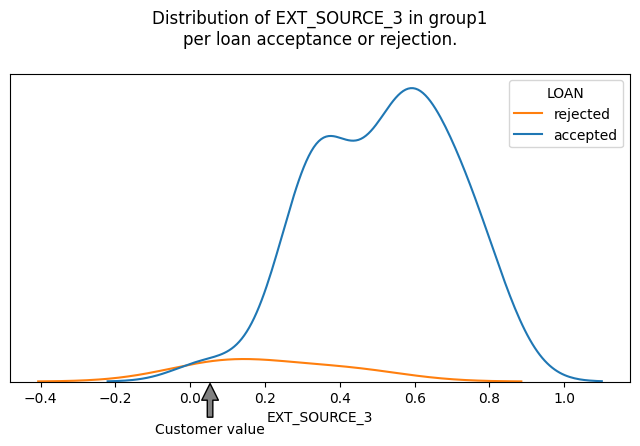

In [85]:
fig, ax = plt.subplots(figsize=(8,4))

sns.kdeplot(
    data=ft_data_targ,
    x=sel_ft,
    hue='TARGET',
    ax=ax,
    legend=False,
)

customer_val = ft_data_targ.loc[customer_id, sel_ft]

ax.get_yaxis().set_visible(False)
ax.annotate(
    'Customer value',
    xy=(customer_val, 0),
    xytext=(customer_val, -0.3),
    arrowprops=dict(facecolor='gray', shrink=0.05),
    ha='center',
)

sel_group= 'group1'

plt.title(
    f'Distribution of {sel_ft} in {sel_group}\n'
    'per loan acceptance or rejection.\n'
)
plt.legend(title='LOAN', loc='best', labels=['rejected', 'accepted'])
plt.show()

In [ ]:
groups = {
    'group1': {
        
    }
}
    

In [ ]:
def plot_group_distribution_and_show_customer_value(
    customer_id, sel_ft, 
)

# Testing the Group class

In [97]:
from group import Group

In [98]:
# Group definitions
Group('group 1', 'Everyone.', None)
Group(
    name='group 2',
    description="People with same education, occupation and age range.",
    grouper=['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AGE_RANGE']
)
Group(
    name='group 3',
    description="People with same credit duration, income type and education.",
    grouper=['CREDIT_TO_ANNUITY_GROUP', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']
)
    

In [101]:
sel_group = Group.all[1]

In [102]:
df.shape

(2000, 735)

In [103]:
customer_id

185507

In [104]:
sel_group.get_group_data(df, customer_id)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,PAYMENT_MEAN_TO_ANNUITY_RATIO,CURRENT_TO_BUREAU_ANNUITY_MEAN_RATIO,CTA_CREDIT_TO_ANNUITY_MAX_RATIO,CTA_CREDIT_TO_ANNUITY_MEAN_RATIO,DAYS_DECISION_MEAN_TO_BIRTH,DAYS_CREDIT_MEAN_TO_BIRTH,DAYS_DECISION_MEAN_TO_EMPLOYED,DAYS_CREDIT_MEAN_TO_EMPLOYED,HOUR_APPR_RATIO,HOUR_APPR_DIFFERENCE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
185507,0,1,0,0,180000.0,531265.5,20155.5,373500.0,0,0,...,1.549284,NaN,1.297440,0.517887,0.084483,0.006518,1.048828,0.080933,1.354492,3.140625
138766,0,0,1,0,225000.0,808650.0,26217.0,675000.0,2,0,...,0.267725,NaN,NaN,NaN,NaN,0.017259,NaN,0.142334,1.058594,1.000000
342778,0,1,0,0,675000.0,1724688.0,54283.5,1575000.0,2,0,...,7.783782,NaN,0.298733,0.298733,0.037980,0.089485,0.854004,2.011719,1.000000,0.000000
331880,0,1,0,1,49500.0,646920.0,20866.5,540000.0,0,0,...,0.230449,NaN,0.699586,0.299193,0.095986,0.111020,0.467773,0.541016,0.846191,-2.000000
270580,1,0,0,0,225000.0,270000.0,13500.0,270000.0,1,0,...,2.285512,NaN,0.495393,0.495393,0.010151,0.001622,0.067932,0.010849,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360484,0,1,0,1,112500.0,257292.0,10944.0,157500.0,0,0,...,0.344978,1.094298,0.214123,0.214123,0.147629,0.067541,0.295166,0.135010,1.307617,4.000000
243202,0,1,0,0,230400.0,900000.0,26446.5,900000.0,2,0,...,0.200221,NaN,0.587695,0.269776,0.094937,0.067636,1.216797,0.866699,1.046875,0.539062
306386,1,1,0,0,157500.0,225000.0,11250.0,225000.0,2,0,...,5.402095,NaN,1.895376,0.879930,0.061581,0.094802,0.615234,0.947266,0.562500,-7.000000


(40, 2)


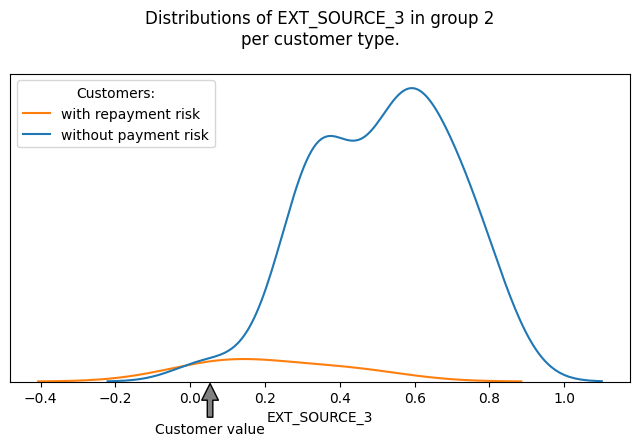

In [109]:
fig = sel_group.plot_feature_kde_with_client_value(
    features_df=df,
    target=target,
    customer_id=customer_id,
    feature_name='EXT_SOURCE_3' ,
)